## Introdution

Cardiovascular disease (CVD) is one of the leading causes of death worldwide. 
Early identification of individuals at high risk can help in preventive care 
and lifestyle modification.

This notebook aims to analyze health-related data and build a classification 
model to predict the probability of heart disease using logistic regression.

In [1]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("heart_disease.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319789 non-null  float64
 2   Smoking           319721 non-null  object 
 3   AlcoholDrinking   319680 non-null  object 
 4   Stroke            319774 non-null  object 
 5   PhysicalHealth    319778 non-null  float64
 6   MentalHealth      319781 non-null  float64
 7   DiffWalking       319762 non-null  object 
 8   Sex               319482 non-null  object 
 9   AgeCategory       319751 non-null  object 
 10  Race              319756 non-null  object 
 11  Diabetic          319762 non-null  object 
 12  PhysicalActivity  319779 non-null  object 
 13  GenHealth         319302 non-null  object 
 14  SleepTime         319576 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [4]:
df.isna().sum()

HeartDisease          0
BMI                   6
Smoking              74
AlcoholDrinking     115
Stroke               21
PhysicalHealth       17
MentalHealth         14
DiffWalking          33
Sex                 313
AgeCategory          44
Race                 39
Diabetic             33
PhysicalActivity     16
GenHealth           493
SleepTime           219
Asthma                0
KidneyDisease        17
SkinCancer            0
dtype: int64

In [5]:
num_cols = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

In [6]:
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [7]:
df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

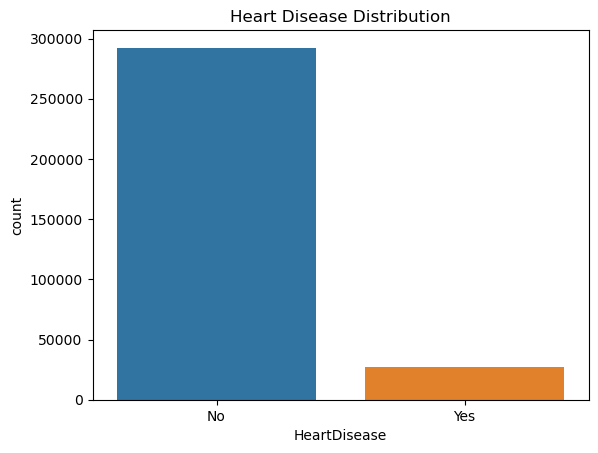

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='HeartDisease', data=df)
plt.title('Heart Disease Distribution')
plt.show()

The diagram shows that the majority of the records are labeled as not having heart disease (approximately 280,000 samples), while a much smaller portion of the data is labeled as having heart disease (approximately 20,000 samples). This indicates that the dataset is highly imbalanced, with significantly fewer positive cases compared to negative cases.

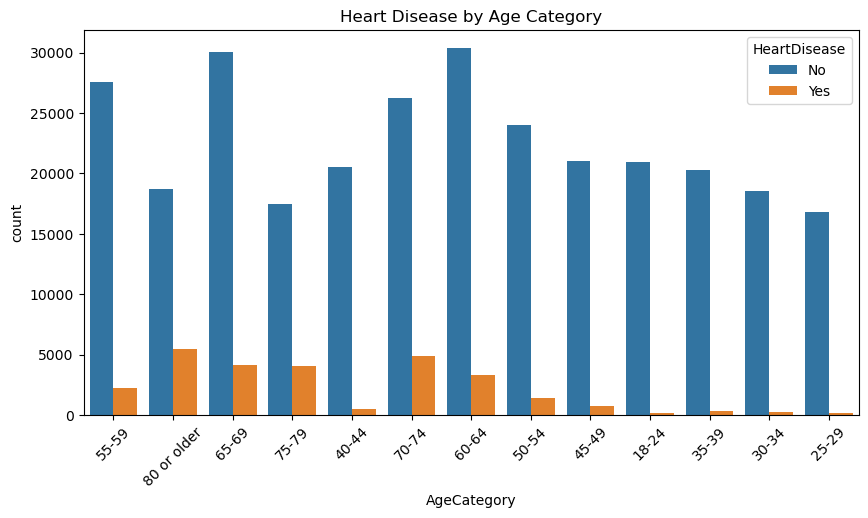

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(x='AgeCategory', hue='HeartDisease', data=df)
plt.xticks(rotation=45)
plt.title('Heart Disease by Age Category')
plt.show()

The count plot shows the relationship between AgeCategory and HeartDisease. The age groups 60–64 and 65–69 contain the largest number of individuals without heart disease, which is likely due to a higher number of samples in these categories. In contrast, the age groups 80 or older and 70–74 show the highest number of individuals with heart disease. Overall, age categories above 60 exhibit a noticeably higher count of heart disease cases compared to younger groups. Age categories below 50 have a very small number of heart disease cases, indicating a lower prevalence of heart disease among younger individuals in the dataset.

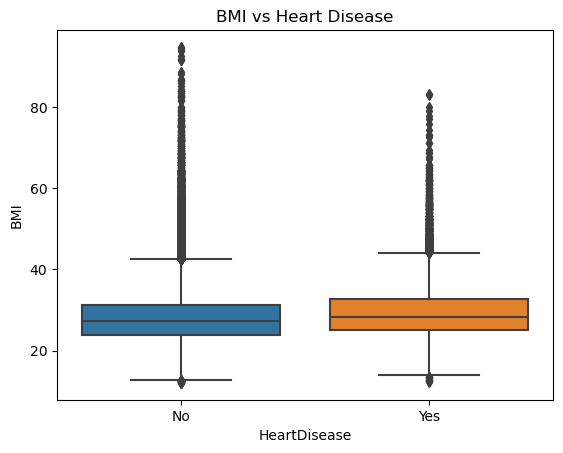

In [10]:
sns.boxplot(x='HeartDisease', y='BMI', data=df)
plt.title('BMI vs Heart Disease')
plt.show()

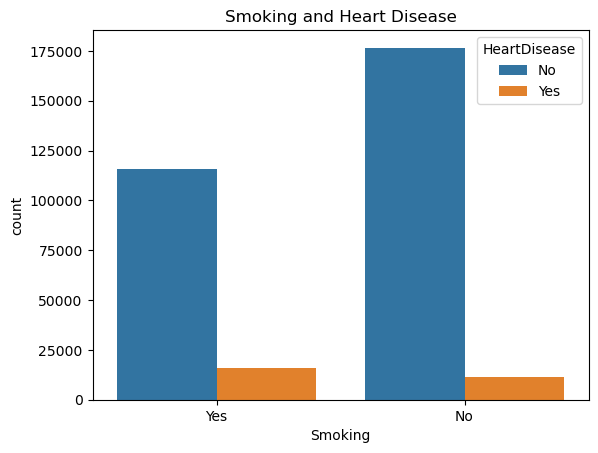

In [11]:
sns.countplot(x='Smoking', hue='HeartDisease', data=df)
plt.title('Smoking and Heart Disease')
plt.show()

The figure illustrates the relationship between smoking status and heart disease. Among individuals who smoke, a higher number of people are affected by heart disease compared to those who do not smoke. Specifically, smokers show a noticeably larger count of heart disease cases than non-smokers. In contrast, individuals who do not smoke have a much higher number of people without heart disease and a comparatively smaller number of heart disease cases. Overall, the visualization suggests that smoking is associated with a higher occurrence of heart disease in the dataset.

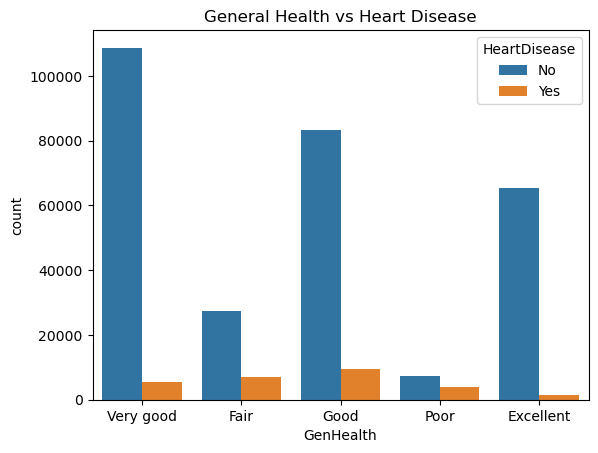

In [12]:
sns.countplot(x='GenHealth', hue='HeartDisease', data=df)
plt.title('General Health vs Heart Disease')
plt.show()

The figure illustrates the relationship between general health and the prevalence of heart disease. Among individuals with heart disease, approximately 10,000 report having good general health, 7,000 report fair health, 4,000 report very good health, 3,000 report poor health, and the fewest, 1,000, report excellent health. Conversely, individuals with very good general health have the highest number of people without heart disease, while those with poor general health have the lowest number of heart disease-free individuals.

In [13]:
df['Diabetic'].unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [14]:
df['Diabetic'] = df['Diabetic'].replace({
    'No': 0,
    'Yes': 1,
    'No, borderline diabetes': 0,
    'Yes (during pregnancy)': 1
})

In [15]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
df[:] = imputer.fit_transform(df)

In [16]:
df['HeartDisease'] = df['HeartDisease'].map({'No': 0, 'Yes': 1})

In [17]:
binary_cols = [
    'Smoking','AlcoholDrinking','Stroke','DiffWalking',
    'PhysicalActivity','Asthma','KidneyDisease','SkinCancer'
]

for col in binary_cols:
    df[col] = df[col].map({'No': 0, 'Yes': 1})

Binary categorical variables were encoded using 0 and 1 to make them suitable 
for machine learning algorithms.

In [18]:
age_map = {
    '18-24':1,'25-29':2,'30-34':3,'35-39':4,'40-44':5,'45-49':6,
    '50-54':7,'55-59':8,'60-64':9,'65-69':10,'70-74':11,
    '75-79':12,'80 or older':13
}
df['AgeCategory'] = df['AgeCategory'].map(age_map)

In [19]:
gen_map = {'Poor':1,'Fair':2,'Good':3,'Very good':4,'Excellent':5}
df['GenHealth'] = df['GenHealth'].map(gen_map)

###
Missing values were handled using imputation. 
Numerical and categorical attributes were filled using the most frequent value 
to preserve the size of the dataset and avoid data loss.

In [20]:
df = pd.get_dummies(df, columns=['Sex','Race'], drop_first=True)

In [21]:
from sklearn.preprocessing import StandardScaler

scale_cols = ['BMI','PhysicalHealth','MentalHealth','SleepTime','AgeCategory']
scaler = StandardScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])

In [22]:
from sklearn.model_selection import train_test_split

X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [23]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced'
)

model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


Logistic Regressionwas chosen due to its simplicity, interpretability, and ability to output probability estimates, making it suitable for medical risk prediction.


In [24]:
y_prob = model.predict_proba(X_test)[:, 1]

In [25]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.8372196259274285


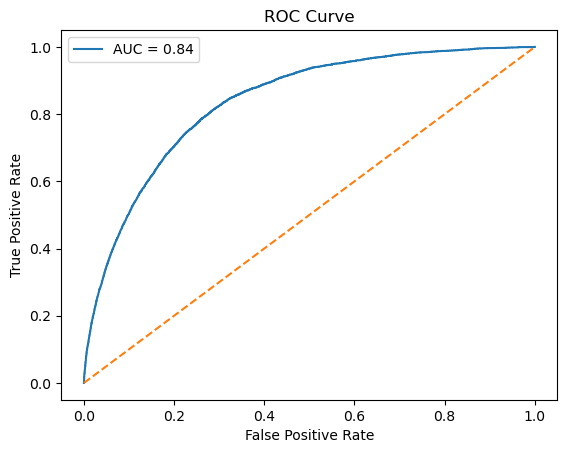

In [26]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

The ROC curve shows that the model performs significantly better than random guessing.
An AUC value above 0.8 indicates good classification performance.

In [27]:
def risk_category(prob):
    if prob < 0.3:
        return "Low Risk"
    elif prob < 0.6:
        return "Moderate Risk"
    else:
        return "High Risk"

sample_prob = y_prob[0]
risk_category(sample_prob)


'Moderate Risk'

This notebook demonstrated the use of basic data preprocessing, visualization, 
and logistic regression to predict heart disease risk. 
The probability-based output allows the model to function as a simple decision 
support system for early cardiovascular disease prevention.